In [16]:
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
from scipy.stats import binom_test, ttest_1samp

In [17]:
from constants import *

In [18]:
dist_column = 'log pareto front scaling distance'

In [19]:
models_df = pd.read_csv('%s/models.csv' % STATISTICS_DIR, skipinitialspace=True)

# apply log transform to both distance columns
models_df['log pareto front distance'] = pylab.log10(models_df['pareto front distance'])
models_df['log pareto front scaling distance'] = pylab.log10(models_df['pareto front scaling distance'])
models_df

,arbor name,model,pareto front distance,pareto front scaling distance,log pareto front distance,log pareto front scaling distance
0,087_1_C_day4,arbor,2.023704,1.072667,0.306147,0.030465
1,087_1_C_day4,random,87.523951,3.043072,1.942127,0.483312
2,087_1_C_day4,random,111.668084,3.634563,2.047929,0.560452
3,087_1_C_day4,random,83.278267,2.974552,1.920532,0.473422
4,087_1_C_day4,random,77.388023,2.803433,1.888674,0.447690
...,...,...,...,...,...,...
197457,009_2_C_day4,random,43.595752,2.483852,1.639444,0.395126
197458,009_2_C_day4,random,26.425926,1.866248,1.422030,0.270969
197459,009_2_C_day4,random,28.050282,1.949740,1.447937,0.289977
197460,009_2_C_day4,random,32.692765,2.087325,1.514452,0.319590


In [20]:
# create a new data frame with just the arbors, sorted by pareto front distance
arbor_rank_df = models_df[models_df['model'] == 'arbor'].sort_values(by=dist_column)
arbor_rank_df['arbor index'] = range(1, len(arbor_rank_df.index) + 1)
arbor_rank_df = arbor_rank_df[['arbor name', 'arbor index']]
arbor_rank_df

,arbor name,arbor index
48228,261_2_S_day4,1
13053,261_2_S_day3,2
52282,252_3_S_day2,3
25761,169_2_C_day1,4
135053,036_2_S_day4,5
...,...,...
137929,282_2_S_day1,5378
16838,240_1_S_day1,5379
132976,228_2_S_day3,5380
32667,092_2_S_day1,5381


In [21]:
# join the models data frame with the data frame that has arbors sorted by distance
scatter_df = pd.merge(models_df, arbor_rank_df)
scatter_df.sort_values(by='model', ascending=False, inplace=True)
scatter_df

,arbor name,model,pareto front distance,pareto front scaling distance,log pareto front distance,log pareto front scaling distance,arbor index
98731,288_3_C_day2,random,5.030376,4.465744,0.701600,0.649894,978
130746,099_1_S_day5,random,56.017115,2.618738,1.748321,0.418092,434
130737,099_1_S_day5,random,50.024807,2.327463,1.699185,0.366883,434
130738,099_1_S_day5,random,51.846624,2.497743,1.714720,0.397548,434
130739,099_1_S_day5,random,55.367206,2.550248,1.743253,0.406582,434
...,...,...,...,...,...,...,...
60012,228_2_C_day1,arbor,0.135155,1.114583,-0.869168,0.047112,4822
11779,121_3_C_day3,arbor,2.074206,1.104636,0.316852,0.043219,4681
185357,009_2_C_day5,arbor,1.802746,1.047165,0.255935,0.020015,2600
108833,189_1_C_day4,arbor,10.058695,1.114500,1.002542,0.047080,4821


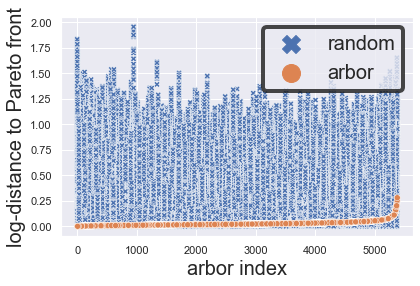

In [22]:
sns.set()
sns.scatterplot(x='arbor index', y=dist_column, hue='model', data=scatter_df,
                style='model', markers={'arbor' : 'o', 'random' : 'X'}, )
leg = pylab.legend(frameon=True, loc='upper right', fontsize=20, edgecolor='k', markerscale=3)
leg.get_frame().set_linewidth(4)
pylab.xlabel('arbor index', size=20)
pylab.ylabel('log-distance to Pareto front', size=20)
pylab.tight_layout()
pylab.savefig('%s/null-models-scatterplot.pdf' % NULL_MODELS_PLOTS_DIR,
              format='pdf')

In [23]:
null_models_df = models_df[models_df['model'] != 'arbor']
null_models_df = null_models_df.rename(columns={'model' : 'null model',
                                                'pareto front distance' : 'null model distance',
                                                'pareto front scaling distance' : 'null model scaling distance',
                                                'log pareto front distance' : 'log null model distance',
                                                'log pareto front distance' : 'log pareto front scaling distance'})
null_models_df

,arbor name,null model,null model distance,null model scaling distance,log pareto front scaling distance,log pareto front scaling distance
1,087_1_C_day4,random,87.523951,3.043072,1.942127,0.483312
2,087_1_C_day4,random,111.668084,3.634563,2.047929,0.560452
3,087_1_C_day4,random,83.278267,2.974552,1.920532,0.473422
4,087_1_C_day4,random,77.388023,2.803433,1.888674,0.447690
5,087_1_C_day4,random,93.436999,3.182372,1.970519,0.502751
...,...,...,...,...,...,...
197457,009_2_C_day4,random,43.595752,2.483852,1.639444,0.395126
197458,009_2_C_day4,random,26.425926,1.866248,1.422030,0.270969
197459,009_2_C_day4,random,28.050282,1.949740,1.447937,0.289977
197460,009_2_C_day4,random,32.692765,2.087325,1.514452,0.319590


In [24]:
scaling_df = pd.read_csv('%s/scaling_distances.csv' % STATISTICS_DIR, skipinitialspace=True)
scaling_df = scaling_df.drop('pareto front scaling location', axis=1)
scaling_df = scaling_df.rename(columns={'pareto front scaling distance' : 'arbor scaling distance'})
scaling_df

,arbor name,arbor scaling distance
0,087_1_C_day4,1.072667
1,084_2_C_day2,1.036260
2,093_1_C_day2,1.057325
3,078_1_C_day4,1.024057
4,089_3_S_day4,1.041909
...,...,...
5377,179_1_C_day4,1.107900
5378,179_1_C_day5,1.155821
5379,179_1_C_day1,1.040962
5380,179_1_C_day2,1.038313


In [25]:
scaling_df = pd.merge(scaling_df, null_models_df)
scaling_df

,arbor name,arbor scaling distance,null model,null model distance,null model scaling distance,log pareto front scaling distance,log pareto front scaling distance
0,087_1_C_day4,1.072667,random,87.523951,3.043072,1.942127,0.483312
1,087_1_C_day4,1.072667,random,111.668084,3.634563,2.047929,0.560452
2,087_1_C_day4,1.072667,random,83.278267,2.974552,1.920532,0.473422
3,087_1_C_day4,1.072667,random,77.388023,2.803433,1.888674,0.447690
4,087_1_C_day4,1.072667,random,93.436999,3.182372,1.970519,0.502751
...,...,...,...,...,...,...,...
192075,179_1_C_day3,1.126814,random,21.115098,2.278875,1.324593,0.357721
192076,179_1_C_day3,1.126814,random,27.685903,2.649220,1.442259,0.423118
192077,179_1_C_day3,1.126814,random,22.889376,2.356338,1.359634,0.372238
192078,179_1_C_day3,1.126814,random,30.290337,2.792294,1.481304,0.445961


In [26]:
scaling_df['ratio'] = scaling_df['null model scaling distance'] / scaling_df['arbor scaling distance']
scaling_df['null success'] = (scaling_df['ratio'] <= 1).astype(int)
scaling_df

,arbor name,arbor scaling distance,null model,null model distance,null model scaling distance,log pareto front scaling distance,log pareto front scaling distance,ratio,null success
0,087_1_C_day4,1.072667,random,87.523951,3.043072,1.942127,0.483312,2.836921,0
1,087_1_C_day4,1.072667,random,111.668084,3.634563,2.047929,0.560452,3.388342,0
2,087_1_C_day4,1.072667,random,83.278267,2.974552,1.920532,0.473422,2.773043,0
3,087_1_C_day4,1.072667,random,77.388023,2.803433,1.888674,0.447690,2.613517,0
4,087_1_C_day4,1.072667,random,93.436999,3.182372,1.970519,0.502751,2.966785,0
...,...,...,...,...,...,...,...,...,...
192075,179_1_C_day3,1.126814,random,21.115098,2.278875,1.324593,0.357721,2.022406,0
192076,179_1_C_day3,1.126814,random,27.685903,2.649220,1.442259,0.423118,2.351071,0
192077,179_1_C_day3,1.126814,random,22.889376,2.356338,1.359634,0.372238,2.091151,0
192078,179_1_C_day3,1.126814,random,30.290337,2.792294,1.481304,0.445961,2.478043,0


In [27]:
scaling_df['ratio'].mean(), "+/-", scaling_df['ratio'].std(ddof=1)

(3.0985108121100104, '+/-', 2.5313758263636523)

In [28]:
ttest_1samp(scaling_df['ratio'], 1)

Ttest_1sampResult(statistic=363.32531289549627, pvalue=0.0)

In [31]:
scaling_df['null success'].mean()

0.015285297792586422

In [32]:
binom_test(scaling_df['null success'].sum(), len(scaling_df['null success']))

1.5e-323